In [2]:
import pandas as pd
import numpy as np
import random
import scipy
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

**Задание**

Провести аналогичные исследования но для чека покупок клиентов (колонки `revenue`)  
в интернет магазине есть 2-ва типа продуктов:
* 100 руб.
* 250 руб.

ну и конечно клиент может ничего не купить  
провести исследование изменился ли средний чек

In [3]:
df = pd.read_csv('ab_datas.csv')

control_group = df.query("group == 'control'")
treatment_group = df.query("group == 'treatment'")

control_group.revenue.value_counts(), treatment_group.revenue.value_counts()


(0      73801
 250    36867
 100    36534
 Name: revenue, dtype: int64,
 0      49199
 100    49081
 250    48996
 Name: revenue, dtype: int64)

In [4]:
#количество сессий всего

n_rows = df.shape[0]
print("Число строк: {}".format(n_rows))

Число строк: 294478


In [5]:
user_total = df.nunique()['user_id']
print("Число уникальных пользователей : {}".format(user_total))

Число уникальных пользователей : 290584


In [6]:
session_counts = df.user_id.value_counts(ascending=False)
non_unique_users = session_counts[session_counts > 1]
print("Число неуникальных вхождений user_id:", 
      non_unique_users.count(), 
      "или", 
      (non_unique_users.count() / df.shape[0] * 100).round(2), 
      "%")

Число неуникальных вхождений user_id: 3894 или 1.32 %


In [7]:
mismatch_1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print("Из тестовой группы неверно направлены {}".format(len(mismatch_1)) + " пользователей")

mismatch_2 = df.query("group == 'control' and landing_page == 'new_page'")
print("Из контрольной группы неверно направлены  {}".format(len(mismatch_2)) + " пользователей")


Из тестовой группы неверно направлены 1965 пользователей
Из контрольной группы неверно направлены  1928 пользователей


In [8]:
print("Средняя покупка по всему датасету: %.3f " % (df.revenue.mean()))

Средняя покупка по всему датасету: 101.968 


In [9]:
print(f"Средний чек по контрольной группе: {control_group.revenue.mean().round(3)}\nСредний чек по тестовой группе: {treatment_group.revenue.mean().round(3)}")

Средний чек по контрольной группе: 87.432
Средний чек по тестовой группе: 116.496


In [10]:
print("Доля нулевых чеков в контрольной группе: %.3f" % (control_group[control_group.revenue == 0].revenue.count() / control_group.shape[0]))
print("Доля нулевых чеков в тестовой группе: %.3f" % (treatment_group[treatment_group.revenue == 0].revenue.count() / treatment_group.shape[0]))

Доля нулевых чеков в контрольной группе: 0.501
Доля нулевых чеков в тестовой группе: 0.334


In [11]:
print("Доля ненулевых чеков в контрольной группе: %.3f" % (control_group[control_group.revenue > 0].revenue.count() / control_group.shape[0]))
print("Доля ненулевых чеков в тестовой группе: %.3f" % (treatment_group[treatment_group.revenue > 0].revenue.count() / treatment_group.shape[0]))

Доля ненулевых чеков в контрольной группе: 0.499
Доля ненулевых чеков в тестовой группе: 0.666


In [12]:
val_counts = (control_group.revenue.value_counts() / control_group.shape[0])[1:]
print("Доли значений чеков в контрольной группе: \n100: %.3f\n250: %.3f" % (val_counts[100], val_counts[250]))

Доли значений чеков в контрольной группе: 
100: 0.248
250: 0.250


In [13]:
val_counts = (treatment_group.revenue.value_counts() / treatment_group.shape[0])[1:]
print("Доли значений чеков в контрольной группе: \n100: %.3f\n250: %.3f" % (val_counts[100], val_counts[250]))

Доли значений чеков в контрольной группе: 
100: 0.333
250: 0.333


In [14]:
print("Соотношение размеров тестовой и контрольной групп: %.3f" % (treatment_group.shape[0]/control_group.shape[0]))
n_rows = df.shape[0]
print("Вероятность, что новый пользователь будет направлен на версию со старым дизайном: {}".format(control_group.shape[0]/n_rows))
print("Вероятность, что новый пользователь будет направлен на версию с новым дизайном: {}".format(treatment_group.shape[0]/n_rows))

Соотношение размеров тестовой и контрольной групп: 1.001
Вероятность, что новый пользователь будет направлен на версию со старым дизайном: 0.49987435394155083
Вероятность, что новый пользователь будет направлен на версию с новым дизайном: 0.5001256460584492


**Часть посетителей, которые попали в обе группы в разное время**

In [15]:
cols = ['user_id', 'group', 'revenue', 'landing_page']
both_grps_entr = control_group[cols].merge(treatment_group[cols], right_on='user_id', left_on='user_id', suffixes=['_control', '_treatment'])

print('Число посетителей, появляющихся в обеих группах:', both_grps_entr.shape[0])
print("По данной подвыборке видно, что 1865 пользователей увидели ту же страницу, что была раньше, при том, что некоторые пользователи определены в неправильные группы:")
both_grps_entr[both_grps_entr.landing_page_control == both_grps_entr.landing_page_treatment].head(10)

Число посетителей, появляющихся в обеих группах: 1895
По данной подвыборке видно, что 1865 пользователей увидели ту же страницу, что была раньше, при том, что некоторые пользователи определены в неправильные группы:


,user_id,group_control,revenue_control,landing_page_control,group_treatment,revenue_treatment,landing_page_treatment
0,767017,control,0,new_page,treatment,250,new_page
1,733976,control,250,new_page,treatment,100,new_page
2,670052,control,0,old_page,treatment,100,old_page
3,867227,control,100,old_page,treatment,250,old_page
4,808613,control,250,new_page,treatment,100,new_page
5,859503,control,100,old_page,treatment,250,old_page
6,637639,control,100,new_page,treatment,100,new_page
7,646342,control,0,new_page,treatment,100,new_page
8,735021,control,0,new_page,treatment,250,new_page
9,678638,control,250,new_page,treatment,250,new_page


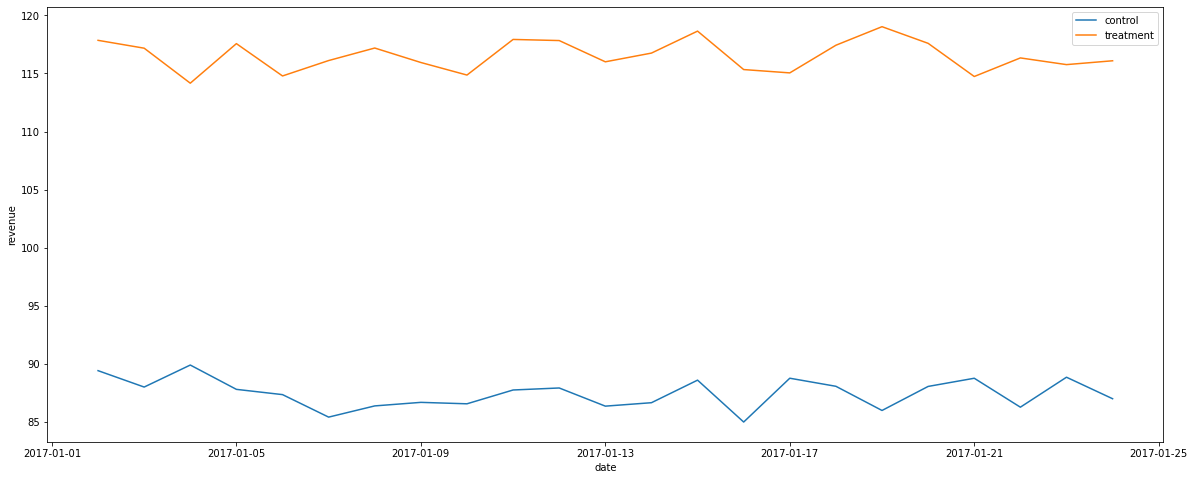

In [18]:
import seaborn as sns
# sales by date
df1 = df.copy()
df1.timestamp = pd.to_datetime(df1.timestamp)
df1 = df1[['timestamp', 'group', 'revenue']].sort_values(by=['timestamp'])

df1['date'] = pd.to_datetime(df1.timestamp).dt.date

control, treatment = df1.query("group == 'control'"), df1.query("group == 'treatment'")

control_revenue_by_date = control.groupby('date').mean().reset_index()
treatment_revenue_by_date = treatment.groupby('date').mean().reset_index()

# plot mean revenues by group and date
plt.figure(figsize=(20, 8))

sns.lineplot(data=control_revenue_by_date, 
             x=control_revenue_by_date.date, 
             y=control_revenue_by_date.revenue,
             label='control');
             
sns.lineplot(data=treatment_revenue_by_date, 
             x=treatment_revenue_by_date.date, 
             y=treatment_revenue_by_date.revenue, 
             label='treatment');

plt.legend();

**Задание**

А теперь ответьте на главный вопрос данного этапа:  выявил ли предварительный анализ, что дизайн кнопки влияет на конверсию и если да, то как именно?

_Показатели средних чеков по группам отличаются - группа пользователей, которые взаимодействовали с новым дизайном, в среднем тратила больше._

**Формулировка рабочей гипотезы**

Средний чек в группе со старым дизайном не меньше, чем с новым.

$H_{0}$ : $\theta_{new}$ <= $\theta_{old}$ 

$H_{1}$ : $\theta_{new}$ > $\theta_{old}$ 

**Z-test и доверительные интервалы**

In [19]:
import statsmodels.api as sm
import statsmodels

treat_mask = treatment_group.revenue.mask(treatment_group.revenue>0, 1)
ctrl_mask = control_group.revenue.mask(control_group.revenue>0, 1)


successes = [treat_mask.sum(), ctrl_mask.sum()]
n_obs = [treatment_group.shape[0], control_group.shape[0]]

z_score, p_value = sm.stats.proportions_ztest(successes, 
                                              nobs=n_obs, 
                                              alternative='larger')

(lower_contr, lower_treat), (upper_contr, upper_treat) = sm.stats.proportion_confint(successes, nobs=n_obs, alpha=0.05)

print("Z-статистика={}, p_value={}".format(z_score, p_value))

print('Доверительный интервал 95% для контрольной выборки: {}'.format((lower_contr.round(3), upper_contr.round(3))))
print('Доверительный интервал 95% для тестовой выборки: {}'.format((lower_treat.round(3), upper_treat.round(3))))

Z-статистика=92.04185904290561, p_value=0.0
Доверительный интервал 95% для контрольной выборки: (0.664, 0.668)
Доверительный интервал 95% для тестовой выборки: (0.496, 0.501)


**T-test**

In [28]:
t_score, p_value, _ = statsmodels.stats.weightstats.ttest_ind(treat_mask,
                                                              ctrl_mask,
                                                              alternative="larger",
                                                              usevar='unequal')

print("T-статистика={},  p_value={}".format(t_score, p_value))

T-статистика=93.3933980918586,  p_value=0.0


#### Проведение вычислений. Mann–Whitney-test.

In [30]:
w_score, p_value = scipy.stats.mannwhitneyu(treat_mask, 
                                            ctrl_mask,
                                            alternative="greater")
print("W-статистика={},  p_value={}".format(w_score, p_value))

W-статистика=12653123315.0,  p_value=0.0


**Выводы по результатам статистических тестов:**

Ранее был выбран порог $\alpha$ = 0.05, размер датасета достаточный, чтобы статистические метрики сошлись на одном и том же значении p_value: 0.0, что позволяет отвергнуть нулевую гипотезу - значит, дизайн кнопки действительно повлиял на средний чек в положительную сторону.

**Bootstrap**

In [32]:
from sklearn.utils import resample

a = ctrl_mask.values
b = treat_mask.values 

a_means, b_means = [], []

for _ in range(10000):
    a_boot = resample(a, replace=True, n_samples=len(a))
    b_boot = resample(b, replace=True, n_samples=len(b))

    a_means.append(a_boot.mean())
    b_means.append(b_boot.mean())

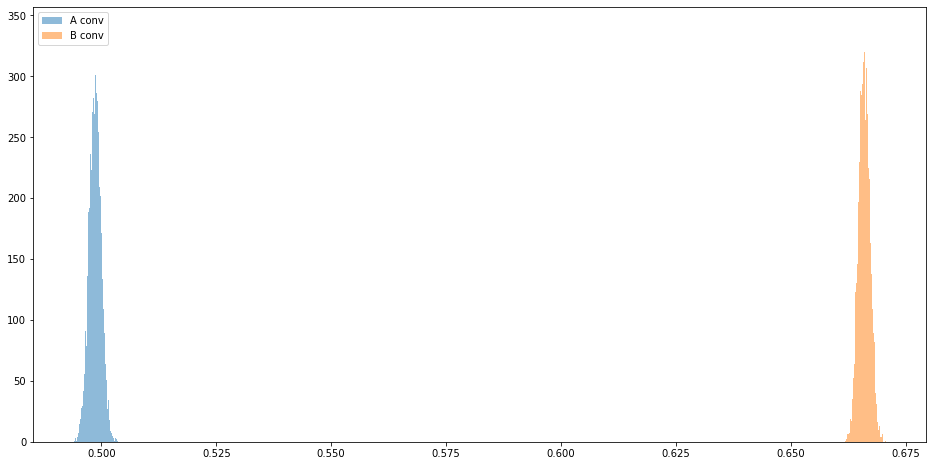

In [39]:
plt.figure(figsize=(16, 8))
plt.hist(a_means, label='A conv', alpha=0.5, bins=100)
plt.hist(b_means, label='B conv', alpha=0.5, bins=100)

plt.legend()
plt.show()

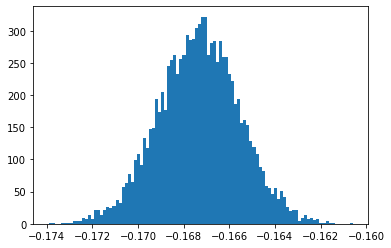

In [40]:
plt.hist(np.array(a_means) - np.array(b_means), bins=100)
plt.show();

In [35]:
dff = np.array(a_means) - np.array(b_means)

len(dff[dff>=0])/len(dff)

0.0

Без сомнений, различия оказались статистически значимыми.